In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from bubbly.bubbly import bubbleplot
import plotly.offline as py

In [85]:
hrt=pd.read_csv("C:\\csv files for python\\datasets_33180_43520_heart.csv")

In [86]:
hrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [87]:
hrt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Description






age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [88]:
hrt.shape

(303, 14)

# <font color='#1CA53B'>DATA OVERVIEW</font>

In [89]:
profile=pandas_profiling.ProfileReport(hrt)
profile

# <font color='#1CA53B'>DATA VISUALIZATION</font>

# <font color=0066FF>no of affected and fit patients</font>
 

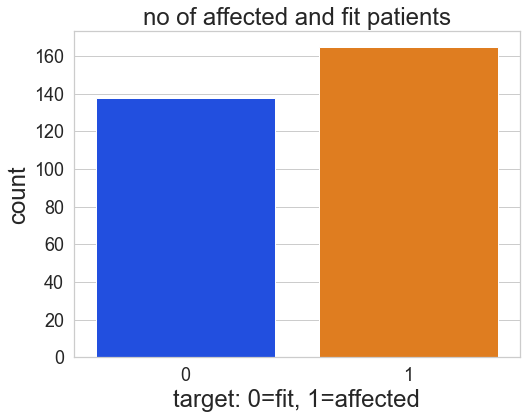

In [205]:
sns.countplot(x='target', data=hrt, palette='bright')
plt.title('no of affected and fit patients',fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel('count',fontsize=24)
plt.xlabel('target: 0=fit, 1=affected',fontsize=24)
plt.show()

# <font color=0066FF>No of male and female patients</font>

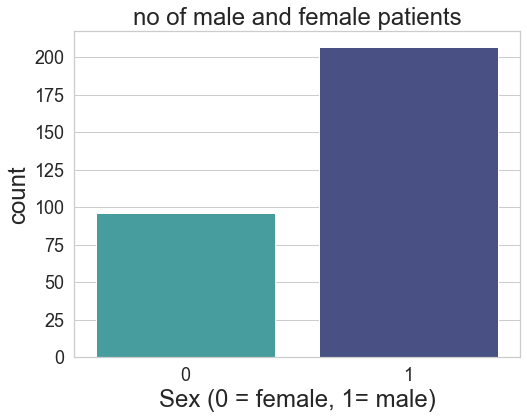

In [169]:
sns.countplot(x='sex', data=hrt, palette="mako_r")
plt.title('no of male and female patients',fontsize=24)
plt.xlabel("Sex (0 = female, 1= male)",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel('count',fontsize=24)
plt.show()

# <font color=0066FF>Heart Disease Frequency for Sex</font>


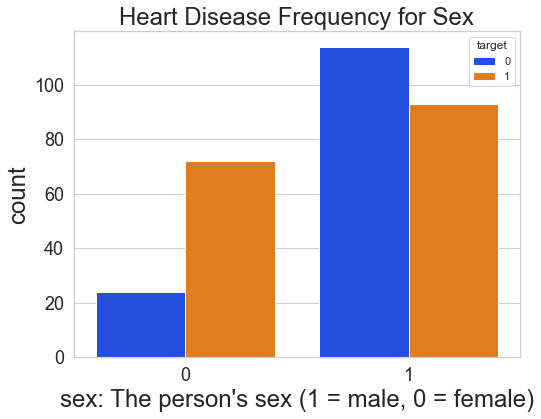

In [170]:
sns.countplot(x='sex',hue='target',data=hrt,palette='bright')
plt.xlabel("sex: The person's sex (1 = male, 0 = female)",fontsize=24)
plt.ylabel('count',fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.title("Heart Disease Frequency for Sex",fontsize=24)
plt.show()

# <font color=0066FF> Heart Disease Frequency based on age</font>

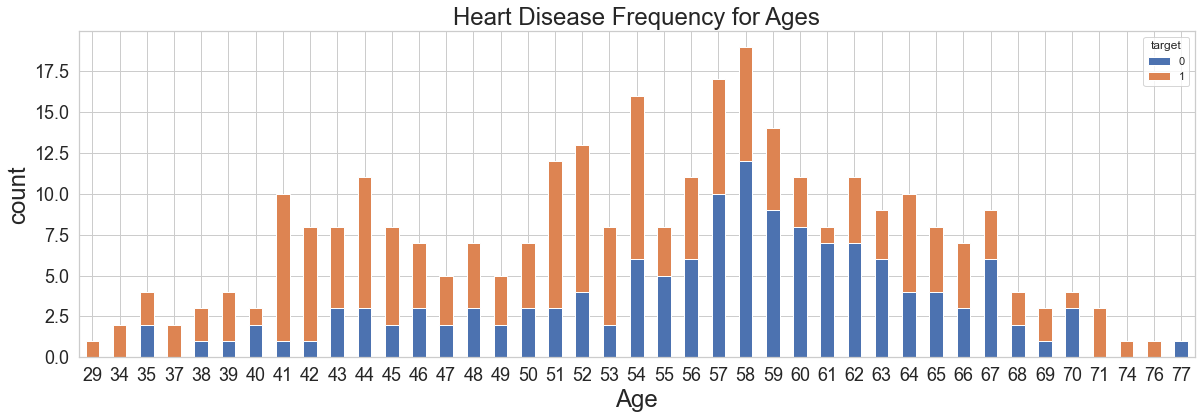

In [171]:
pd.crosstab(hrt.age,hrt.target).plot(kind="bar",figsize=(20,6),stacked=True)
plt.title('Heart Disease Frequency for Ages',fontsize=24)
plt.xlabel('Age',fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel('count',fontsize=24)
plt.savefig('heartDiseaseAndAges.png')
plt.show()


# <font color=0066FF>BP vs Chol. vs Age vs Sex vs Heart Rate</font>

In [172]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = hrt, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

# <font color=0066FF>Heart Disease Frequency based on  Age and Heart rate

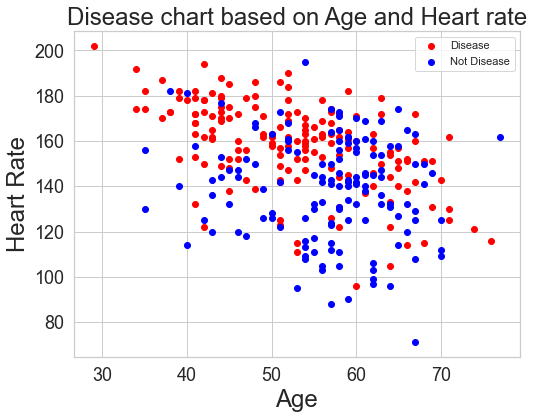

In [173]:
plt.scatter(x=hrt.age[hrt.target==1], y=hrt.thalach[(hrt.target==1)], c="red")
plt.scatter(x=hrt.age[hrt.target==0], y=hrt.thalach[(hrt.target==0)], c="blue")
plt.legend(["Disease", "Not Disease"])
plt.title("Disease chart based on Age and Heart rate",fontsize=24)
plt.xlabel("Age",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel("Heart Rate",fontsize=24)

plt.show()

# <font color=0066FF>Heart Disease Frequency based on Age and cholesterol rate

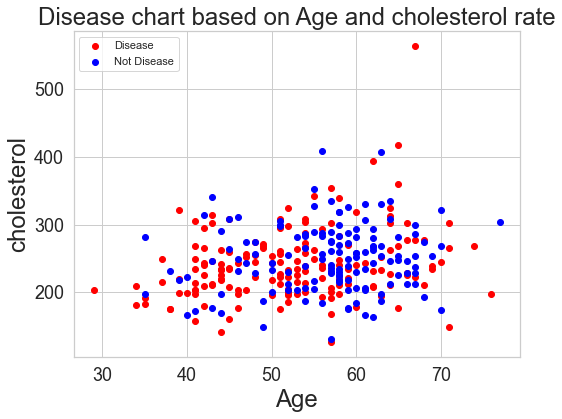

In [174]:
plt.scatter(x=hrt.age[hrt.target==1], y=hrt.chol[(hrt.target==1)], c="red")
plt.scatter(x=hrt.age[hrt.target==0], y=hrt.chol[(hrt.target==0)], c="blue")
plt.legend(["Disease", "Not Disease"])
plt.title("Disease chart based on Age and cholesterol rate",fontsize=24)
plt.xlabel("Age",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel("cholesterol",fontsize=24)

plt.show()


# <font color=0066FF>Heart Disease Frequency for Slope</font>

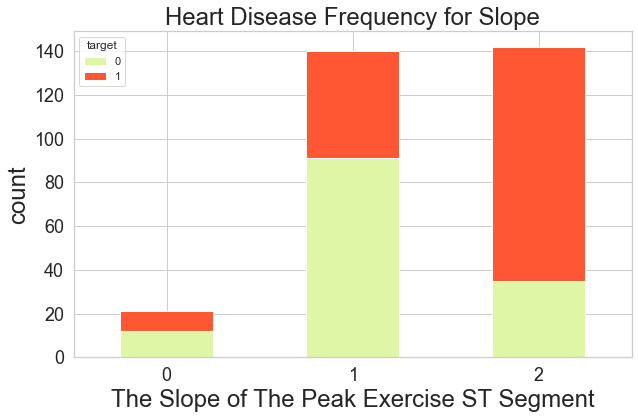

In [215]:
pd.crosstab(hrt.slope,hrt.target).plot(kind="bar",figsize=(10,6),color=['#DFF6A6','#FF5733'],stacked=True)
plt.title('Heart Disease Frequency for Slope',fontsize=24)
plt.xlabel('The Slope of The Peak Exercise ST Segment',fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel('count',fontsize=24)
plt.show()

# <font color=0066FF>Heart Disease Frequency According To FBS</font>

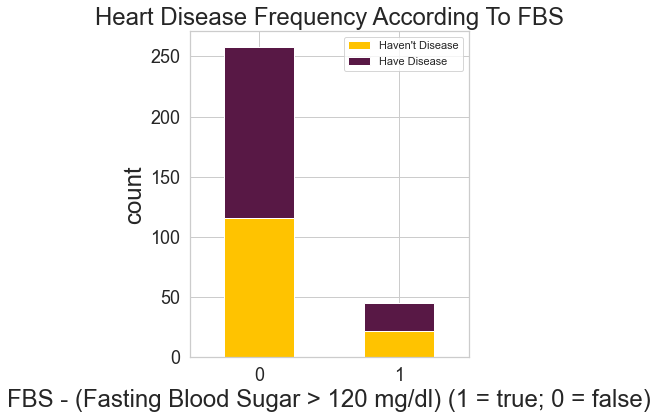

In [176]:
pd.crosstab(hrt.fbs,hrt.target).plot(kind="bar",figsize=(5,6),color=['#FFC300','#581845'],stacked=True)
plt.title('Heart Disease Frequency According To FBS',fontsize=24)
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)',fontsize=24)
plt.xticks(rotation = 0,fontsize=18)

plt.yticks(rotation=0, fontsize=18)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('count',fontsize=24)
plt.show()


# <font color=0066FF>Heart Disease Frequency According To Chest Pain Type</font>

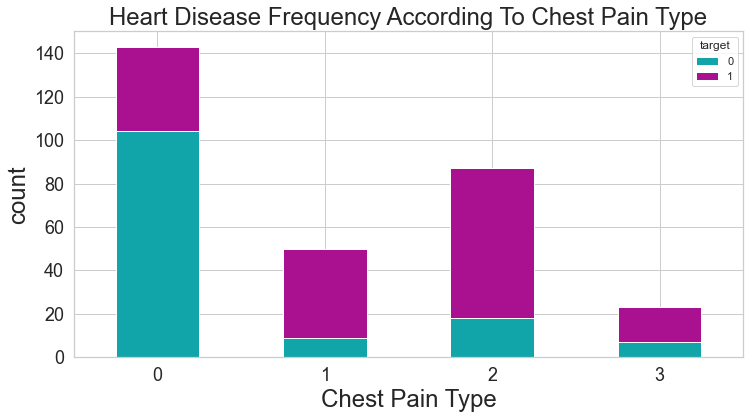

In [204]:
pd.crosstab(hrt.cp,hrt.target).plot(kind="bar",figsize=(12,6),color=['#11A5AA','#AA1190'],stacked=True)
plt.title('Heart Disease Frequency According To Chest Pain Type',fontsize=24)
plt.xlabel('Chest Pain Type',fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.ylabel('count',fontsize=24)
plt.show()

# <font color=F5105C>Applying "qcut" of q=3 on the column "chol" to get three levels of cholesterol</font>

In [178]:
bin_labels = ['low', 'medium', 'high']
hrt['chol level'] = pd.qcut(hrt['chol'],q=3,labels=bin_labels)

# <font color=green>Applying "qcut" of q=3 on the column "trestbps" to get three levels of person's resting blood pressure</font>

In [179]:
bin_labels1 = ['low', 'medium', 'high']
hrt['trestbps level'] = pd.qcut(hrt['trestbps'],q=3,labels=bin_labels1)

In [180]:
hrt['chol level'].value_counts()

medium    102
low       101
high      100
Name: chol level, dtype: int64

In [181]:
results, bin_edges = pd.qcut(hrt['chol'],q=3,labels=bin_labels,retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels),
                            columns=['Threshold', 'Tier'])

In [182]:
results_table

,Threshold,Tier
0,126.000000,low
1,221.666667,medium
2,263.000000,high


In [183]:
hrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,0,0,0,1,0,1,0


# <font color=0066FF>Heart Disease Frequency based on levels of ECG</font>

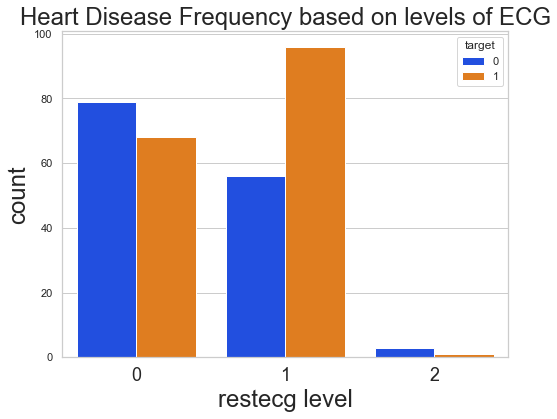

In [184]:
sns.countplot(x='restecg',hue='target',data=hrt,palette='bright')
plt.title("Heart Disease Frequency based on levels of ECG",fontsize=24)
plt.xlabel('restecg level',fontsize=24)
plt.xticks(rotation = 0,fontsize=18)
plt.yticks(rotation=0, fontsize=11)
plt.ylabel('count',fontsize=24)
plt.show()

# <font color=11A5AA>Creating dummy columns for "cp","thal","slope"</font>

In [185]:
a = pd.get_dummies(hrt['cp'],prefix='cp')
b = pd.get_dummies(hrt['thal'], prefix = "thal")
c = pd.get_dummies(hrt['slope'], prefix = "slope")
hrt=pd.concat([hrt,a,b,c],axis = 1)


In [186]:
hrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,0,0,0,1,0,1,0


## <font color=FF00FF> dictionary that will hold all the accuracy scores of the six algorithms</font>

In [187]:
accuracies={}

# <font color="7F00FF">LOGISTIC REGRESSION classifier</font>
## <font color=7F00FF>Train Test split at 30%</font>


In [188]:
X1=hrt[['age', 'sex',  'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak',  'ca','cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']]
y1=hrt["target"]
X1 = (X1 - np.min(X1)) / (np.max(X1) - np.min(X1)).values

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [191]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X1_train,y1_train)
acc = lr.score(X1_test,y1_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy of Logistic Regression is {:.2f}%".format(acc))

Test Accuracy of Logistic Regression is 82.42%


### Sigmoid Function
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

# <font color="7F00FF">K NEAREST NEIGHBOUR classifier</font>
## <font color=7F00FF>Train Test split at 20%</font>


In [192]:
X=hrt[['age', 'sex',  'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak',  'ca','cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']]
y = hrt.target.values
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)

acc = knn.score(X_test,y_test)*100
accuracies['KNN'] = acc
print("Test Accuracy of KNN Algorithm: {:.2f}%".format(acc))

Test Accuracy of KNN Algorithm: 77.05%


# <font color="7F00FF">SVM Algorithm</font>
## <font color=7F00FF>Train Test split at 20%</font>


In [196]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.61%


# <font color="7F00FF">Naive Bayes Algorithm</font>
## <font color=7F00FF>Train Test split at 20%</font>


In [197]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Test Accuracy of Naive Bayes Algorithm: {:.2f}%".format(acc))

Test Accuracy of Naive Bayes Algorithm: 83.61%


# <font color="7F00FF">Decision Tree Algorithm</font>
## <font color=7F00FF>Train Test split at 20%</font>


In [198]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Test Accuracy of Decision Tree Algorithm: {:.2f}%".format(acc))

Test Accuracy of Decision Tree Algorithm: 80.33%


# <font color="7F00FF">Random Forest classifier</font>
## <font color=7F00FF>Train Test split at 20%</font>


In [199]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Test Accuracy of Random Forest Algorithm: {:.2f}%".format(acc))

Test Accuracy of Random Forest Algorithm: 90.16%


# <font color="7F00FF">Accuracy % of all the six algorithms</font>

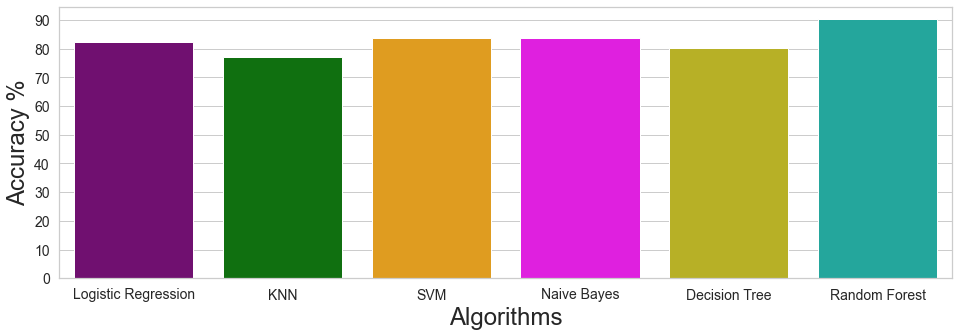

In [200]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %",fontsize=24)
plt.xlabel("Algorithms",fontsize=24)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.xticks(rotation = 0,fontsize=14)

plt.yticks(rotation=0, fontsize=14)
plt.show()

# <font color=FF0066>PREDICTED VALUES OF ALL THE SIX ALGORITHMS</font>

In [201]:
y_head_lr = lr.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_rf = rf.predict(X_test)

# <font color=7F00FF>CONFUSION MATRICES OF ALL THE SIX ALGORITHMS</font>

In [202]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


# <font color=00CDFF> PLOTING THE CONFUSION MATRICES OF ALL THE SIX ALGORITHMS</font>

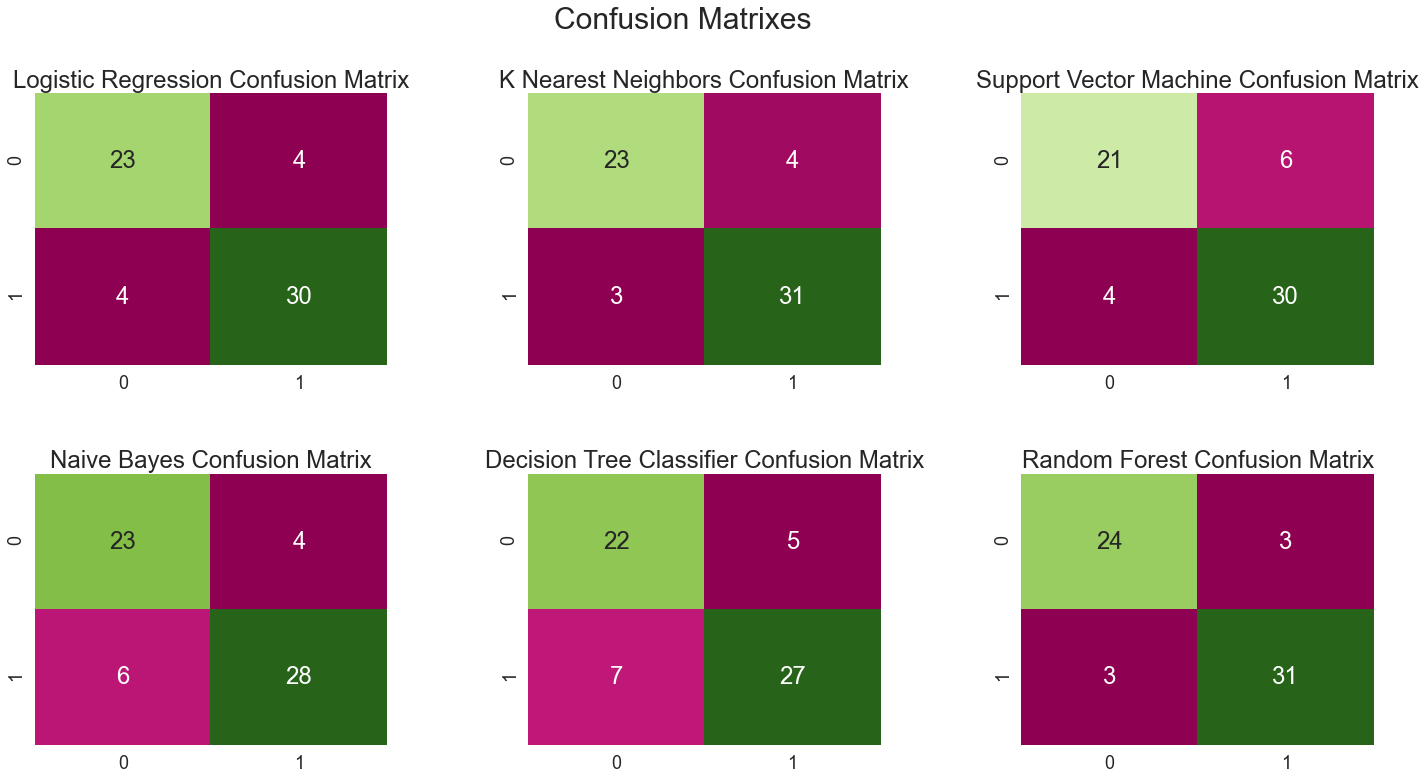

In [203]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=30)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
sns.heatmap(cm_lr,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
sns.heatmap(cm_knn,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
sns.heatmap(cm_svm,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
sns.heatmap(cm_nb,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
sns.heatmap(cm_dtc,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix",fontsize=24)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
sns.heatmap(cm_rf,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()